# Amr Hacoglu - #GRIPAUGUST2024

# #7 Stock Market Prediction using Numerical and Textual Analysis

## 📋 Overview

This notebook demonstrates the creation of a hybrid model for predicting stock price/performance. The model combines numerical analysis of historical stock prices with sentimental analysis of news headlines. The following steps will be covered:

1. Importing Libraries
1. Loading and Preparing the Data
1. Numerical Analysis of Stock Prices
1. Sentimental Analysis of News Headlines
1. Creating the Hybrid Model
1. Making Predictions
1. Evaluating the Model

Let's get started! 🚀

# Importing Libraries

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from textblob import TextBlob
import matplotlib.pyplot as plt

# Loading and Preparing the Data
Historical Stock Prices

In [43]:
# Load historical stock prices
stock_data = pd.read_excel('/kaggle/input/task-7-datasets/SENSEX_Historical_Data.xlsx')

# Display the first few rows of the stock data
print(stock_data.head())

        Date         Open         High          Low        Close    Adj Close  \
0 2001-01-02  3953.219971  4028.570068  3929.370117  4018.879883  4018.879883   
1 2001-01-03  3977.580078  4067.659912  3977.580078  4060.020020  4060.020020   
2 2001-01-04  4180.970215  4180.970215  4109.549805  4115.370117  4115.370117   
3 2001-01-05  4116.339844  4195.009766  4115.350098  4183.729980  4183.729980   
4 2001-01-08  4164.759766  4206.720215  4101.529785  4120.430176  4120.430176   

   Volume  
0       0  
1       0  
2       0  
3       0  
4       0  


In [44]:
# Check for missing values and data types
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2430 non-null   datetime64[ns]
 1   Open       2430 non-null   float64       
 2   High       2430 non-null   float64       
 3   Low        2430 non-null   float64       
 4   Close      2430 non-null   float64       
 5   Adj Close  2430 non-null   float64       
 6   Volume     2430 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 133.0 KB


In [45]:
stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [46]:
stock_data = stock_data.drop_duplicates()

News Headlines

In [47]:
# Load news headlines
news_data = pd.read_csv('/kaggle/input/task-7-datasets/india-news-headlines.csv', delimiter=';')

# Display the first few rows of the news data
news_data.head()

/tmp/ipykernel_33/2344650436.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  news_data = pd.read_csv('/kaggle/input/task-7-datasets/india-news-headlines.csv', delimiter=';')


,publish_date,headline_category,headline_text,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya,NaN,NaN,NaN
1,2001-01-03,unknown,Fissures in Hurriyat over Pak visit,NaN,NaN,NaN
2,2001-01-04,unknown,America's unwanted heading for India?,NaN,NaN,NaN
3,2001-01-05,unknown,For bigwigs,NaN,NaN,NaN
4,2001-01-06,unknown,Extra buses to clear tourist traffic,NaN,NaN,NaN


In [48]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   publish_date       1048575 non-null  object
 1   headline_category  1048575 non-null  object
 2   headline_text      1048573 non-null  object
 3   Unnamed: 3         406 non-null      object
 4   Unnamed: 4         37 non-null       object
 5   Unnamed: 5         3 non-null        object
dtypes: object(6)
memory usage: 48.0+ MB


In [49]:
news_data = news_data.drop_duplicates()

In [50]:
news_data['headline_text'] = news_data['headline_text'].fillna('')

In [51]:
news_data = news_data.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'])

In [52]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   publish_date       1048575 non-null  object
 1   headline_category  1048575 non-null  object
 2   headline_text      1048575 non-null  object
dtypes: object(3)
memory usage: 24.0+ MB


# Numerical Analysis of Stock Prices

In [53]:
# Convert Date column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Set Date as index
stock_data.set_index('Date', inplace=True)

# Feature Engineering - Calculate daily returns
stock_data['Return'] = stock_data['Close'].pct_change()

# Drop missing values
stock_data.dropna(inplace=True)

# Prepare features and target variable
X = stock_data[['Open', 'High', 'Low', 'Volume']]
y = stock_data['Return']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.00013772682620390788
R^2 Score: 0.5673582699127375


# Sentimental Analysis of News Headlines

In [54]:
# Convert 'publish_date' to datetime format
news_data['publish_date'] = pd.to_datetime(news_data['publish_date'], format='%Y-%m-%d', errors='coerce')

# Add a sentiment score to the news headlines
news_data['Sentiment'] = news_data['headline_text'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Display the first few rows with sentiment scores
print(news_data.head())

  publish_date headline_category                                headline_text  \
0   2001-01-02           unknown  Status quo will not be disturbed at Ayodhya   
1   2001-01-03           unknown          Fissures in Hurriyat over Pak visit   
2   2001-01-04           unknown        America's unwanted heading for India?   
3   2001-01-05           unknown                                  For bigwigs   
4   2001-01-06           unknown         Extra buses to clear tourist traffic   

   Sentiment  
0       0.00  
1       0.00  
2       0.00  
3       0.00  
4       0.05  


# Creating the Hybrid Model

In [55]:
# Convert 'Date' to datetime format in stock_data for merging
stock_data.reset_index(inplace=True)
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d', errors='coerce')

# Merge stock data with news sentiment data
combined_data = pd.merge(stock_data, news_data, left_on='Date', right_on='publish_date')

# Prepare features and target variable
X_combined = combined_data[['Open', 'High', 'Low', 'Volume', 'Sentiment']]
y_combined = combined_data['Return']

# Split the data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# Standardize features
X_train_combined = scaler.fit_transform(X_train_combined)
X_test_combined = scaler.transform(X_test_combined)

# Create and train the Linear Regression model for hybrid model
hybrid_model = LinearRegression()
hybrid_model.fit(X_train_combined, y_train_combined)

# Predict on the test set
y_pred_combined = hybrid_model.predict(X_test_combined)

# Evaluate the hybrid model
mse_combined = mean_squared_error(y_test_combined, y_pred_combined)
r2_combined = r2_score(y_test_combined, y_pred_combined)
print(f'Hybrid Model - Mean Squared Error: {mse_combined}')
print(f'Hybrid Model - R^2 Score: {r2_combined}')

Hybrid Model - Mean Squared Error: 0.0005638229755689345
Hybrid Model - R^2 Score: -1.8726141673777832


# Making Predictions

In [56]:
# Example new data point
new_data = pd.DataFrame({
    'Open': [4000],
    'High': [4050],
    'Low': [3980],
    'Volume': [1500000],
    'Sentiment': [0.1]  # Example sentiment score
})

# Standardize new data
new_data_scaled = scaler.transform(new_data)

# Predict the return for new data
new_prediction = hybrid_model.predict(new_data_scaled)
print(f'Predicted Return for new data: {new_prediction}')

Predicted Return for new data: [0.00989781]


# Evaluating the Model

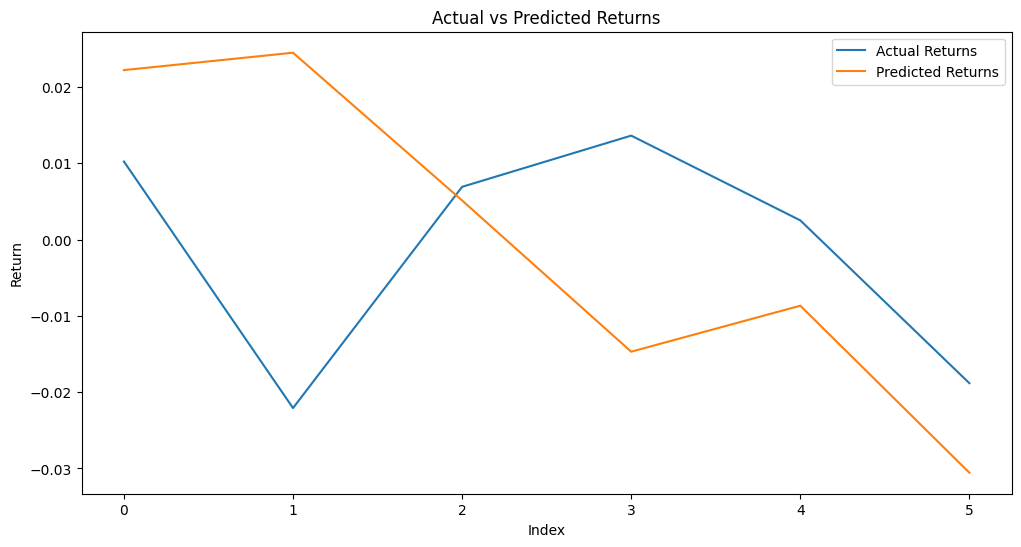

In [57]:
# Plot the predictions vs actual returns
plt.figure(figsize=(12, 6))
plt.plot(y_test_combined.values, label='Actual Returns')
plt.plot(y_pred_combined, label='Predicted Returns')
plt.xlabel('Index')
plt.ylabel('Return')
plt.legend()
plt.title('Actual vs Predicted Returns')
plt.show()